In [4]:
from math import exp, sqrt
import matplotlib.pyplot as plt
import random
import sys
import pandas as pd
import numpy as np
import os,errno
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import csgraph
from numpy import linalg as LA

In [5]:
def RBF_kernel(gamma,A,B) :
    diff = np.linalg.norm(A-B)
    d = np.exp(-(diff)/(2*gamma**2))
    return d

# Data intialization methods for kernel kmeans
#init by batch
def initByBatch(X,num_data,K):
    init_clust = [[[None] for i in range(0)] for j in range(K)]
    for k in range (K-1):
        init_clust[k] = ( X[k*(int (num_data/K)):(k+1)*(int (num_data/K))] )
    init_clust[K-1] = ( X[(K-1)*(int (num_data/K)):num_data] )
    
    return init_clust

#init by Mod
def initByMod(X,num_data,K):
    init_clust = [[[None] for i in range(0)] for j in range(K)]
    for i in range (num_data):
        init_clust[i%K].append(X[i])
    return init_clust

def initRandom(X,num_data,K):
    init_clust = [[[None] for i in range(0)] for j in range(K)]
    for i in range (num_data):
        init_clust[random.choice(range(K))].append(X[i])
    return init_clust

def randomClustering (X,num_data,K):
    init_clust = [[[None] for i in range(0)] for j in range(K)]
    #random assign
    for i in range (num_data):
        k = random.randint(0,K-1)
        init_clust[k].append(X[i])
    return init_clust

In [ ]:
def kernel_kmeans(X,num_data,K,init_flag=0): 
   
    if init_flag==0:
        init_data =initByBatch(X,num_data,K)
    elif init_flag==1:
        init_data = initByMod(X,num_data,K)
    elif init_flag==2:
        init_data =initRandom(X,num_data,K)
    elif init_flag==3:
        init_data = randomClustering(X,num_data,K)
    
    color = ["b","g","m","r","k"]
    gamma = 0.25
    mean = np.zeros(K)
    iteration = 0
    path ="plots/kernelKmeans_"+ dataset_name +"_"+str(K)
    try:
        os.makedirs(path)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise
    for it in range (100) :
        
        miu =  np.zeros((K,2))
        # calculate mean for plotting
        for k in range (K) :
            miu[k] = np.mean(init_data[k],axis =0)
          

        for k in range (K):
            _=plt.plot(np.array(init_data[k])[:,0],np.array(init_data[k])[:,1],color[k]+"o", alpha = 0.8)
            _=plt.plot(miu[k,0],miu[k,1],"k*", markersize=12, alpha = 1)

        # calculate mean
        newMu = np.zeros(K)
        #calculate mean
        for k in range (K):
            sizeK = len(init_data[k])
            temp_sum =0
            for i in range (sizeK):
                for j in range (sizeK):
                    temp_sum += RBF_kernel(gamma,init_data[k][i],init_data[k][j])
            newMu[k] = temp_sum/(sizeK**2)

        if ( sqrt(np.linalg.norm(newMu-mean)) < 0.00001):
            iteration = it
            break
        mean = newMu.copy()
    
        clusterData = [[[None] for i in range(0)] for j in range(K)]
        print("computing cluster ...")
        for i in range (num_data) :
            min_dist = 10000000
            nearestK = - 1
            for k in range (K) :
                sizeK = len(init_data[k])
                temp_dist = mean[k]
                for j in range (sizeK) :
                    temp_dist -= 2*(RBF_kernel(gamma,init_data[k][j],X[i]))/sizeK
                if (temp_dist < min_dist) :
                    min_dist = temp_dist
                    nearestK = k
            #print (minD)   
            clusterData[nearestK].append (X[i])

        plt.title("KernelKmeans" +" iter " +str(it))
        plt.axis('equal')
        plt.savefig(path+"/kernelKMean_"+ dataset_name +"_"+ str(it)+".png", bbox_inches="tight")
        plt.clf()
        clusterData = np.array(clusterData)
        init_data = clusterData.copy()

    print ("Kernel Kmeans converged after ", iteration, " iteration(s)")

Enter file name:circle.txt
Enter the K number of clusters :4
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing cluster ...
computing clust

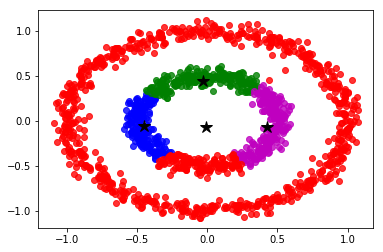

In [26]:
fileName = input("Enter file name:")
dataset_name= fileName[:4]
kCluster = int(input('Enter the K number of clusters :'))
data = pd.read_csv(fileName,header=None)
data = np.array(data)
num_data = data.shape[0]
np.random.shuffle(data)
_=kernel_kmeans(data, num_data, kCluster, init_flag=3)